# MNIST Basic Approach

In [1]:
import tensorflow as tf

/home/hdsingh/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.test.num_examples

10000

In [8]:
mnist.validation.num_examples

5000

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
mnist.train.images.shape

(55000, 784)

In [11]:
mnist.train.images[1].shape

(784,)

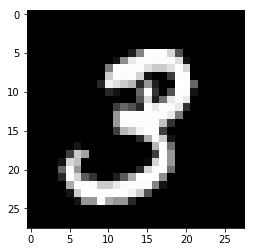

In [14]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gray')

In [16]:
mnist.train.images[1].min()

0.0

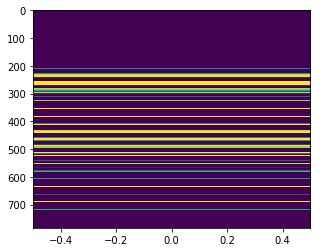

In [22]:
plt.imshow(mnist.train.images[0].reshape(784,1),aspect=0.001)

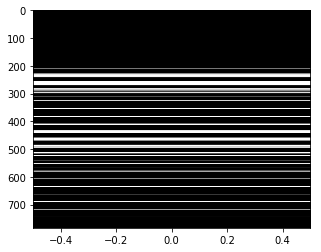

In [23]:
plt.imshow(mnist.train.images[0].reshape(784,1),cmap='gray',aspect=0.001)

## Create Model

In [24]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [26]:
W = tf.Variable(tf.zeros([784,10]))
W.shape

TensorShape([Dimension(784), Dimension(10)])

In [27]:
b = tf.Variable(tf.zeros([10]))

In [28]:
y = tf.matmul(x,W) + b

In [29]:
y_true = tf.placeholder(tf.float32,[None,10])

In [30]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [41]:
optimizer = tf.train.GradientDescentOptimizer(0.1)

In [42]:
train = optimizer.minimize(cross_entropy)

In [43]:
init = tf.global_variables_initializer()

In [45]:
steps = 10000
with tf.Session() as sess:
    
    sess.run(init)
    
    for step in range(steps):
        batch_x,batch_y = mnist.train.next_batch(100)
        sess.run(train,feed_dict = {x:batch_x,y_true:batch_y})
    
    #test the train model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    print(sess.run(acc,feed_dict = {x:mnist.test.images,y_true:mnist.test.labels}))

0.9242
